## Get the Data

## Import Statements

In [47]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

Read the .csv file and store it in a Pandas dataframe

In [64]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

Examine the first 5 rows and the last 5 rows of the of the dataframe

In [65]:
print(df.head())
print(df.tail())

                  DATE       TAG  POSTS
0  2008-07-01 00:00:00        c#      3
1  2008-08-01 00:00:00  assembly      8
2  2008-08-01 00:00:00         c     83
3  2008-08-01 00:00:00        c#    504
4  2008-08-01 00:00:00       c++    164
                     DATE     TAG  POSTS
2561  2023-12-01 00:00:00     php   1385
2562  2023-12-01 00:00:00  python   7907
2563  2023-12-01 00:00:00       r   1688
2564  2023-12-01 00:00:00    ruby    169
2565  2023-12-01 00:00:00   swift    813


Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [66]:
df.shape

(2566, 3)

Count the number of entries in each column of the dataframe

In [67]:
df.count()

DATE     2566
TAG      2566
POSTS    2566
dtype: int64

Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [68]:
df.groupby('TAG').sum().sort_values(by='POSTS', ascending=False)

,DATE,POSTS
TAG,,
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2519681
python,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2175985
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1911751
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1608904
php,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1462339
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,802973
r,2008-09-01 00:00:002008-11-01 00:00:002008-12-...,501541
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,401845
swift,2009-01-01 00:00:002009-02-01 00:00:002009-03-...,331760


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.
How many months of data exist per language? Which language had the fewest months with an entry? 


In [69]:
df.groupby('TAG').count().sort_values(by='DATE', ascending=True)

,DATE,POSTS
TAG,,
go,170,170
swift,177,177
r,183,183
assembly,185,185
c,185,185
c++,185,185
delphi,185,185
java,185,185
javascript,185,185


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [72]:
df['DATE'] = pd.to_datetime(df['DATE']).dt.strftime('%Y-%m-%d')

In [73]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

In [77]:
reshaped_df.fillna(0, inplace=True) 
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,504.0,164.0,14.0,0.0,222.0,163.0,28.0,157.0,119.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,807.0,112.0,0.0,1149.0,722.0,128.0,608.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1730.0,734.0,140.0,0.0,954.0,580.0,97.0,499.0,448.0,1.0,157.0,0.0


## Data Manipulation



What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [97]:
print(reshaped_df.shape)

(186, 14)


In [98]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [99]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,504.0,164.0,14.0,0.0,222.0,163.0,28.0,157.0,119.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,807.0,112.0,0.0,1149.0,722.0,128.0,608.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1730.0,734.0,140.0,0.0,954.0,580.0,97.0,499.0,448.0,1.0,157.0,0.0


Count the number of entries per programming language

In [100]:
reshaped_df.count()

TAG
assembly      186
c             186
c#            186
c++           186
delphi        186
go            186
java          186
javascript    186
perl          186
php           186
python        186
r             186
ruby          186
swift         186
dtype: int64

## Data Visualisaton with with Matplotlib


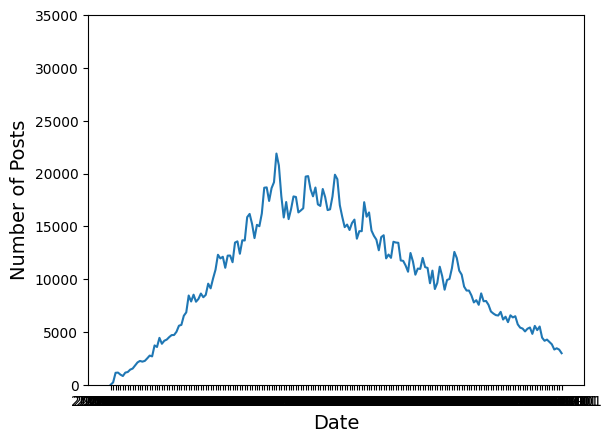

In [85]:
plt.plot(reshaped_df.index, reshaped_df.java)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.show()

Show two line (e.g. for Java and Python) on the same chart.

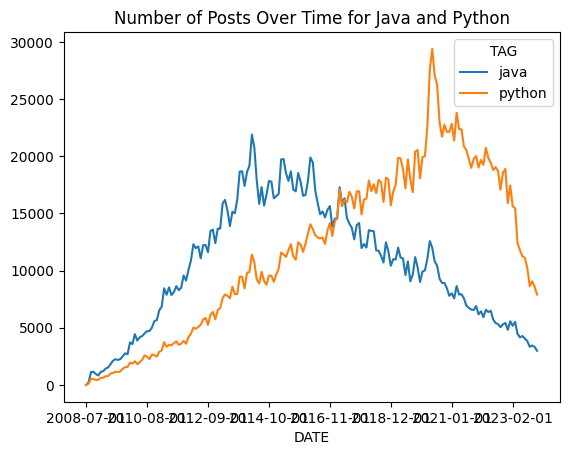

In [88]:
reshaped_df[['java', 'python']].plot.line(title='Number of Posts Over Time for Java and Python')
plt.show()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

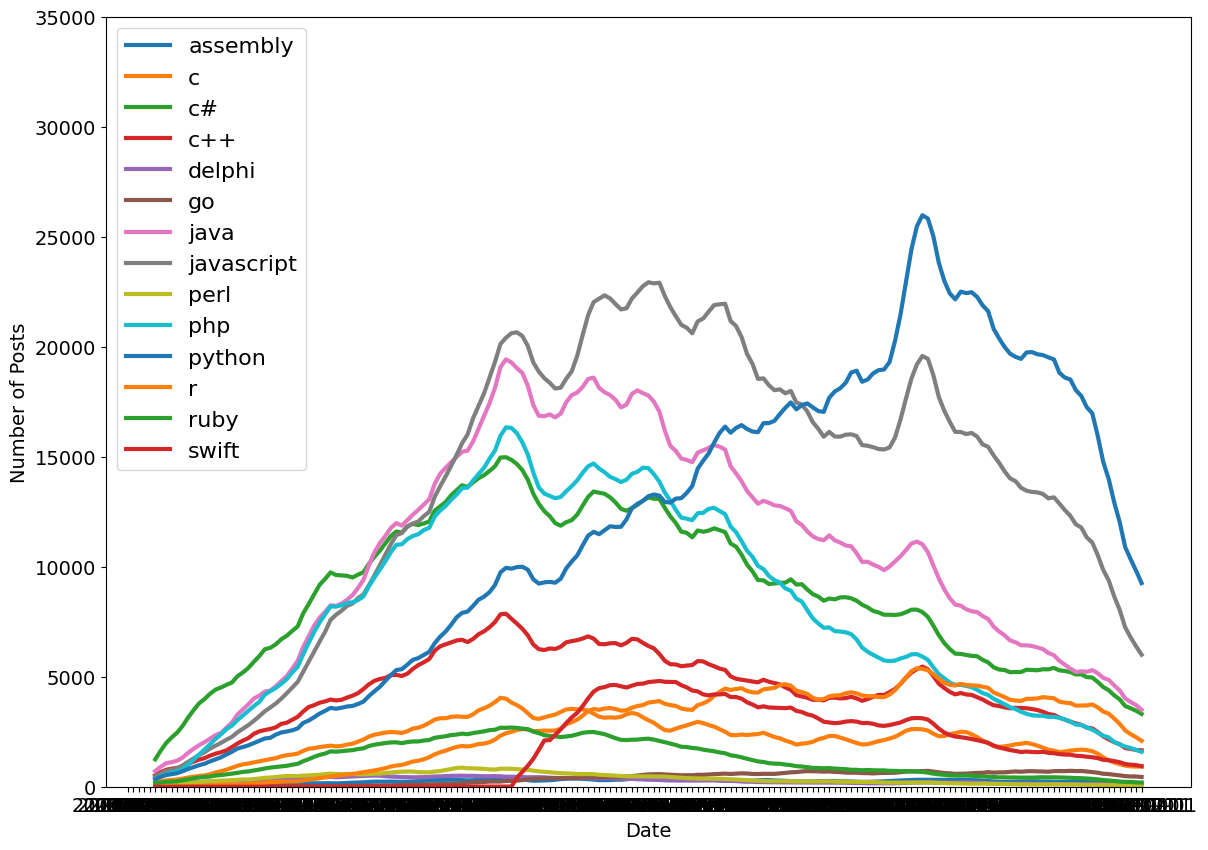

In [91]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(14,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

In [96]:
filtered_df = reshaped_df.loc['2008-01-01':'2012-12-31']

# Calculate the sum of posts for each tag
tag_sums = filtered_df.sum()

# Find the tag with the highest total
most_popular_tag = tag_sums.idxmax()
print(most_popular_tag)

c#
